# Feature Engineering & Encoding

### 4.1 Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import ppscore as pps
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Inspect data  
print("FEATURE ENGINEERING & ENCODING - TELCO CUSTOMER CHURN")


df = pd.read_csv('../data/processed/telco_cleaned.csv')
print(f"\n✅ Data loaded: {df.shape}")
print(f"   Rows: {df.shape[0]:,} customers")
print(f"   Columns: {df.shape[1]} features")

print(f"\nColumn List ({len(df.columns)} total):")
print(f"{df.columns.tolist()}")

FEATURE ENGINEERING & ENCODING - TELCO CUSTOMER CHURN

✅ Data loaded: (7032, 20)
   Rows: 7,032 customers
   Columns: 20 features

Column List (20 total):
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


### 4.2 Identify Feature Types

In [4]:

print("STEP 1: FEATURE TYPE CLASSIFICATION")


numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n📊 NUMERICAL FEATURES ({len(numerical_features)}):")

for col in numerical_features:
    unique = df[col].nunique()
    dtype = df[col].dtype
    print(f"  • {col:20s} | Unique: {unique:5d} | Type: {dtype} | Range: [{df[col].min()}, {df[col].max()}]")

print(f"\n🏷️  CATEGORICAL FEATURES ({len(categorical_features)}):")

for col in categorical_features:
    unique = df[col].nunique()
    print(f"  • {col:20s} | Unique: {unique:5d} | Values: {df[col].unique().tolist()}")


STEP 1: FEATURE TYPE CLASSIFICATION

📊 NUMERICAL FEATURES (5):
  • SeniorCitizen        | Unique:     2 | Type: int64 | Range: [0, 1]
  • tenure               | Unique:    72 | Type: int64 | Range: [1, 72]
  • MonthlyCharges       | Unique:  1584 | Type: float64 | Range: [18.25, 118.75]
  • TotalCharges         | Unique:  6530 | Type: float64 | Range: [18.8, 8684.8]
  • Churn                | Unique:     2 | Type: int64 | Range: [0, 1]

🏷️  CATEGORICAL FEATURES (15):
  • gender               | Unique:     2 | Values: ['Female', 'Male']
  • Partner              | Unique:     2 | Values: ['Yes', 'No']
  • Dependents           | Unique:     2 | Values: ['No', 'Yes']
  • PhoneService         | Unique:     2 | Values: ['No', 'Yes']
  • MultipleLines        | Unique:     3 | Values: ['No phone service', 'No', 'Yes']
  • InternetService      | Unique:     3 | Values: ['DSL', 'Fiber optic', 'No']
  • OnlineSecurity       | Unique:     3 | Values: ['No', 'Yes', 'No internet service']
  • Online

### 4.3 Encode Categorical Variables

In [5]:

print("STEP 2: ENCODE CATEGORICAL VARIABLES")


df_encoded = df.copy()
label_encoders = {}

print(f"\nEncoding {len(categorical_features)} categorical features using LabelEncoder...\n")

for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    
    print(f"✓ {col}:")
    for class_label, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        print(f"    {class_label:25s} → {encoded_value}")
    print()

print("✅ All categorical features encoded!")
print(f"   Encoded data shape: {df_encoded.shape}")

STEP 2: ENCODE CATEGORICAL VARIABLES

Encoding 15 categorical features using LabelEncoder...

✓ gender:
    Female                    → 0
    Male                      → 1

✓ Partner:
    No                        → 0
    Yes                       → 1

✓ Dependents:
    No                        → 0
    Yes                       → 1

✓ PhoneService:
    No                        → 0
    Yes                       → 1

✓ MultipleLines:
    No                        → 0
    No phone service          → 1
    Yes                       → 2

✓ InternetService:
    DSL                       → 0
    Fiber optic               → 1
    No                        → 2

✓ OnlineSecurity:
    No                        → 0
    No internet service       → 1
    Yes                       → 2

✓ OnlineBackup:
    No                        → 0
    No internet service       → 1
    Yes                       → 2

✓ DeviceProtection:
    No                        → 0
    No internet service       → 1
    Yes  

### 4.4 Correlation Matrix with Encoded Data

In [8]:

print("STEP 3: CORRELATION ANALYSIS")


correlation_matrix = df_encoded.corr()
churn_correlations = correlation_matrix['Churn'].sort_values(ascending=False)

print(f"\nFeature Correlation with CHURN (Target Variable):")

print(f"{'Feature':<25} | {'Correlation':>12} | {'Interpretation':<30}")


for feature, corr_value in churn_correlations.items():
    if feature == 'Churn':
        continue
    
    # Determine strength
    abs_corr = abs(corr_value)
    if abs_corr >= 0.3:
        strength = "🔴 STRONG"
    elif abs_corr >= 0.15:
        strength = "🟡 MODERATE"
    else:
        strength = "🟢 WEAK"
    
    # Determine direction
    direction = "↑ Positive" if corr_value > 0 else "↓ Negative"
    interpretation = f"{strength} {direction}"
    
    print(f"{feature:<25} | {corr_value:>12.4f} | {interpretation:<30}")



STEP 3: CORRELATION ANALYSIS

Feature Correlation with CHURN (Target Variable):
Feature                   |  Correlation | Interpretation                
MonthlyCharges            |       0.1929 | 🟡 MODERATE ↑ Positive         
PaperlessBilling          |       0.1915 | 🟡 MODERATE ↑ Positive         
SeniorCitizen             |       0.1505 | 🟡 MODERATE ↑ Positive         
PaymentMethod             |       0.1079 | 🟢 WEAK ↑ Positive             
MultipleLines             |       0.0380 | 🟢 WEAK ↑ Positive             
PhoneService              |       0.0117 | 🟢 WEAK ↑ Positive             
gender                    |      -0.0085 | 🟢 WEAK ↓ Negative             
StreamingTV               |      -0.0363 | 🟢 WEAK ↓ Negative             
StreamingMovies           |      -0.0388 | 🟢 WEAK ↓ Negative             
InternetService           |      -0.0471 | 🟢 WEAK ↓ Negative             
Partner                   |      -0.1500 | 🟢 WEAK ↓ Negative             
Dependents                |     

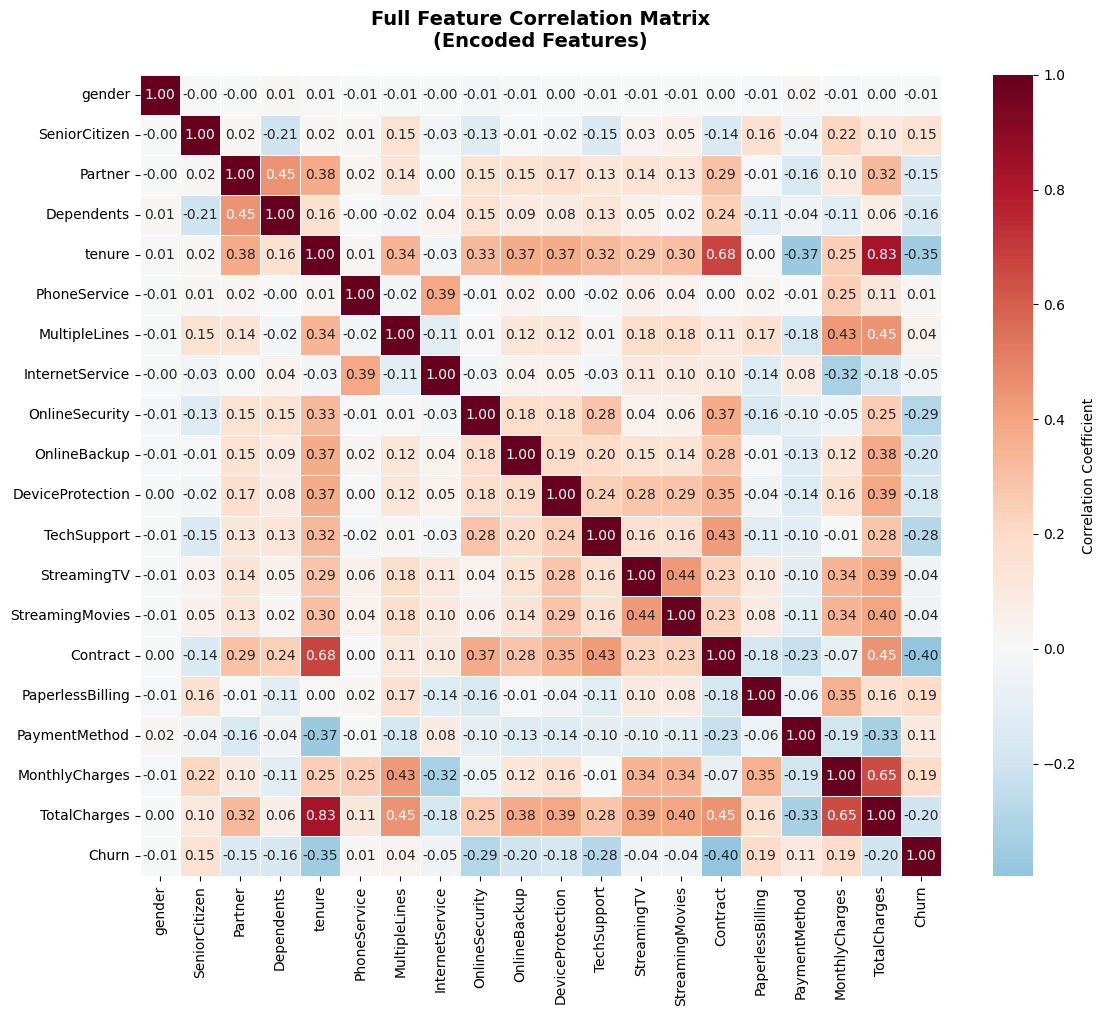

In [9]:
# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'},
            ax=ax)

ax.set_title('Full Feature Correlation Matrix\n(Encoded Features)', 
             fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../data/processed/12a_full_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

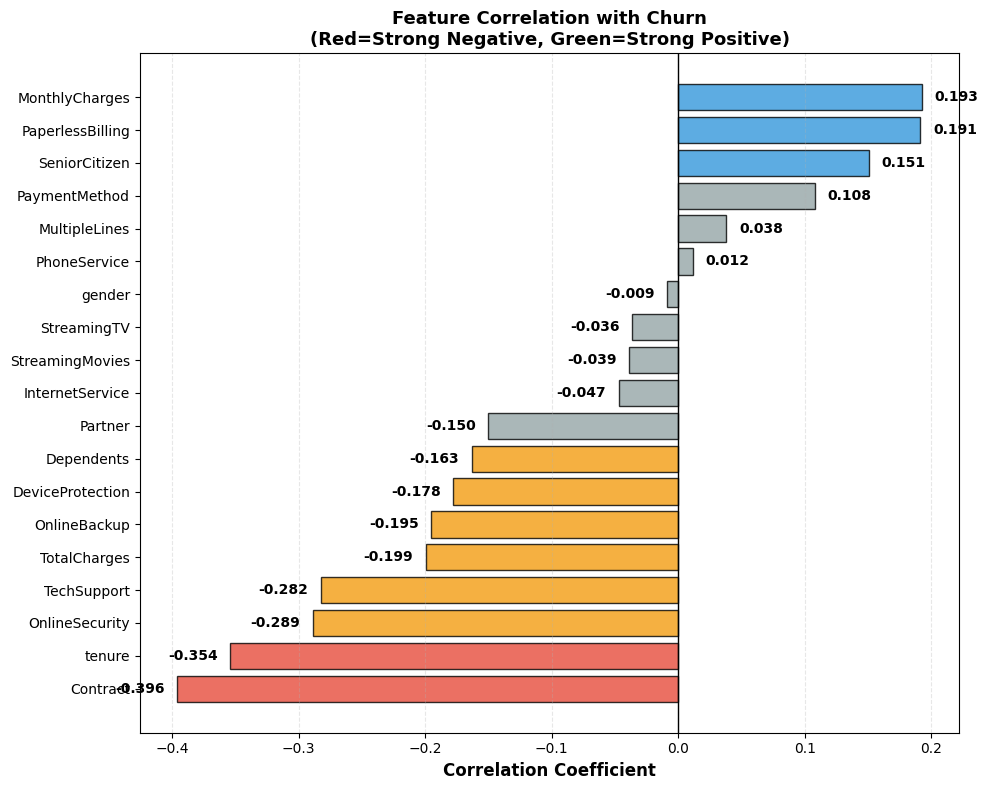

In [10]:
# Visualize correlations with Churn only
fig, ax = plt.subplots(figsize=(10, 8))

churn_corr_sorted = churn_correlations[churn_correlations.index != 'Churn'].sort_values()
colors = ['#e74c3c' if x < -0.3 else '#f39c12' if x < -0.15 else '#95a5a6' if x < 0.15 
          else '#3498db' if x < 0.3 else '#2ecc71' for x in churn_corr_sorted.values]

ax.barh(range(len(churn_corr_sorted)), churn_corr_sorted.values, color=colors, edgecolor='black', alpha=0.8)
ax.set_yticks(range(len(churn_corr_sorted)))
ax.set_yticklabels(churn_corr_sorted.index)
ax.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
ax.set_title('Feature Correlation with Churn\n(Red=Strong Negative, Green=Strong Positive)', 
             fontsize=13, fontweight='bold')
ax.axvline(x=0, color='black', linewidth=1)
ax.grid(axis='x', alpha=0.3, linestyle='--')

for i, v in enumerate(churn_corr_sorted.values):
    ax.text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}', 
            va='center', ha='left' if v > 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/12b_churn_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.5 Feature Importance Analysis (PPS)

In [16]:


print("STEP 4: FEATURE IMPORTANCE ANALYSIS (Information-Based Approach)")

from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

# Prepare data
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

STEP 4: FEATURE IMPORTANCE ANALYSIS (Information-Based Approach)


In [17]:
# Method 1: Mutual Information
print("⏳ Method 1: Mutual Information (Non-linear relationships)...")
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print("\n✅ Top 15 Features by Mutual Information:")
print("-" * 80)
for idx, row in mi_df.head(15).iterrows():
    score = row['MI_Score']
    if score >= 0.05:
        category = "🔴 STRONG"
    elif score >= 0.02:
        category = "🟡 MODERATE"
    else:
        category = "🟢 WEAK"
    print(f"  {row['Feature']:<25} | MI Score: {score:.4f} | {category}")

⏳ Method 1: Mutual Information (Non-linear relationships)...

✅ Top 15 Features by Mutual Information:
--------------------------------------------------------------------------------
  Contract                  | MI Score: 0.1043 | 🔴 STRONG
  tenure                    | MI Score: 0.0797 | 🔴 STRONG
  TechSupport               | MI Score: 0.0682 | 🔴 STRONG
  OnlineSecurity            | MI Score: 0.0614 | 🔴 STRONG
  InternetService           | MI Score: 0.0595 | 🔴 STRONG
  DeviceProtection          | MI Score: 0.0565 | 🔴 STRONG
  OnlineBackup              | MI Score: 0.0539 | 🔴 STRONG
  TotalCharges              | MI Score: 0.0445 | 🟡 MODERATE
  MonthlyCharges            | MI Score: 0.0441 | 🟡 MODERATE
  PaymentMethod             | MI Score: 0.0406 | 🟡 MODERATE
  StreamingTV               | MI Score: 0.0303 | 🟡 MODERATE
  StreamingMovies           | MI Score: 0.0291 | 🟡 MODERATE
  Partner                   | MI Score: 0.0172 | 🟢 WEAK
  PaperlessBilling          | MI Score: 0.0171 | 🟢 WEA

In [18]:
# Method 2: Random Forest Feature Importance
print("\n⏳ Method 2: Random Forest Feature Importance...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X, y)
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'RF_Importance': rf_model.feature_importances_
}).sort_values('RF_Importance', ascending=False)

print("\n✅ Top 15 Features by Random Forest Importance:")
print("-" * 80)
for idx, row in rf_importance.head(15).iterrows():
    score = row['RF_Importance']
    if score >= 0.05:
        category = "🔴 STRONG"
    elif score >= 0.02:
        category = "🟡 MODERATE"
    else:
        category = "🟢 WEAK"
    print(f"  {row['Feature']:<25} | RF Importance: {score:.4f} | {category}")


⏳ Method 2: Random Forest Feature Importance...

✅ Top 15 Features by Random Forest Importance:
--------------------------------------------------------------------------------
  TotalCharges              | RF Importance: 0.1916 | 🔴 STRONG
  MonthlyCharges            | RF Importance: 0.1813 | 🔴 STRONG
  tenure                    | RF Importance: 0.1570 | 🔴 STRONG
  Contract                  | RF Importance: 0.0788 | 🔴 STRONG
  PaymentMethod             | RF Importance: 0.0506 | 🔴 STRONG
  OnlineSecurity            | RF Importance: 0.0460 | 🟡 MODERATE
  TechSupport               | RF Importance: 0.0442 | 🟡 MODERATE
  gender                    | RF Importance: 0.0275 | 🟡 MODERATE
  OnlineBackup              | RF Importance: 0.0274 | 🟡 MODERATE
  InternetService           | RF Importance: 0.0259 | 🟡 MODERATE
  PaperlessBilling          | RF Importance: 0.0256 | 🟡 MODERATE
  Partner                   | RF Importance: 0.0235 | 🟡 MODERATE
  MultipleLines             | RF Importance: 0.0213 

### 4.6 COMBINED FEATURE IMPORTANCE SCORE

In [22]:
print("STEP 5: COMBINED FEATURE IMPORTANCE RANKING")
# Normalize scores
mi_df['MI_Score_Norm'] = (mi_df['MI_Score'] - mi_df['MI_Score'].min()) / (mi_df['MI_Score'].max() - mi_df['MI_Score'].min())
rf_importance['RF_Norm'] = (rf_importance['RF_Importance'] - rf_importance['RF_Importance'].min()) / (rf_importance['RF_Importance'].max() - rf_importance['RF_Importance'].min())

STEP 5: COMBINED FEATURE IMPORTANCE RANKING


In [24]:
# Normalize scores
mi_df['MI_Score_Norm'] = (mi_df['MI_Score'] - mi_df['MI_Score'].min()) / (mi_df['MI_Score'].max() - mi_df['MI_Score'].min())
rf_importance['RF_Norm'] = (rf_importance['RF_Importance'] - rf_importance['RF_Importance'].min()) / (rf_importance['RF_Importance'].max() - rf_importance['RF_Importance'].min())

In [25]:
# Merge and create combined score
combined_importance = mi_df.merge(rf_importance[['Feature', 'RF_Norm']], on='Feature')
combined_importance['Combined_Score'] = (combined_importance['MI_Score_Norm'] + combined_importance['RF_Norm']) / 2
combined_importance = combined_importance.sort_values('Combined_Score', ascending=False).reset_index(drop=True)

In [26]:
# Categorize features
strong_features = combined_importance[combined_importance['Combined_Score'] >= 0.15]
moderate_features = combined_importance[(combined_importance['Combined_Score'] >= 0.05) & (combined_importance['Combined_Score'] < 0.15)]
weak_features = combined_importance[combined_importance['Combined_Score'] < 0.05]

print(f"\n{'Rank':<6} {'Feature':<25} {'Combined Score':<15} {'Category':<12}")
print("-" * 80)

for idx, row in combined_importance.head(15).iterrows():
    score = row['Combined_Score']
    if score >= 0.15:
        category = "🔴 STRONG"
    elif score >= 0.05:
        category = "🟡 MODERATE"
    else:
        category = "🟢 WEAK"
    print(f"{idx+1:<6} {row['Feature']:<25} {score:<15.4f} {category:<12}")



Rank   Feature                   Combined Score  Category    
--------------------------------------------------------------------------------
1      tenure                    0.7898          🔴 STRONG    
2      TotalCharges              0.7133          🔴 STRONG    
3      Contract                  0.6979          🔴 STRONG    
4      MonthlyCharges            0.6836          🔴 STRONG    
5      TechSupport               0.4324          🔴 STRONG    
6      OnlineSecurity            0.4047          🔴 STRONG    
7      InternetService           0.3417          🔴 STRONG    
8      OnlineBackup              0.3188          🔴 STRONG    
9      PaymentMethod             0.3172          🔴 STRONG    
10     DeviceProtection          0.3145          🔴 STRONG    
11     StreamingTV               0.1761          🔴 STRONG    
12     StreamingMovies           0.1716          🔴 STRONG    
13     PaperlessBilling          0.1372          🟡 MODERATE  
14     Partner                   0.1324          🟡

### 4.6 VISUALIZATIONS

   Creating Plot 1: Mutual Information...


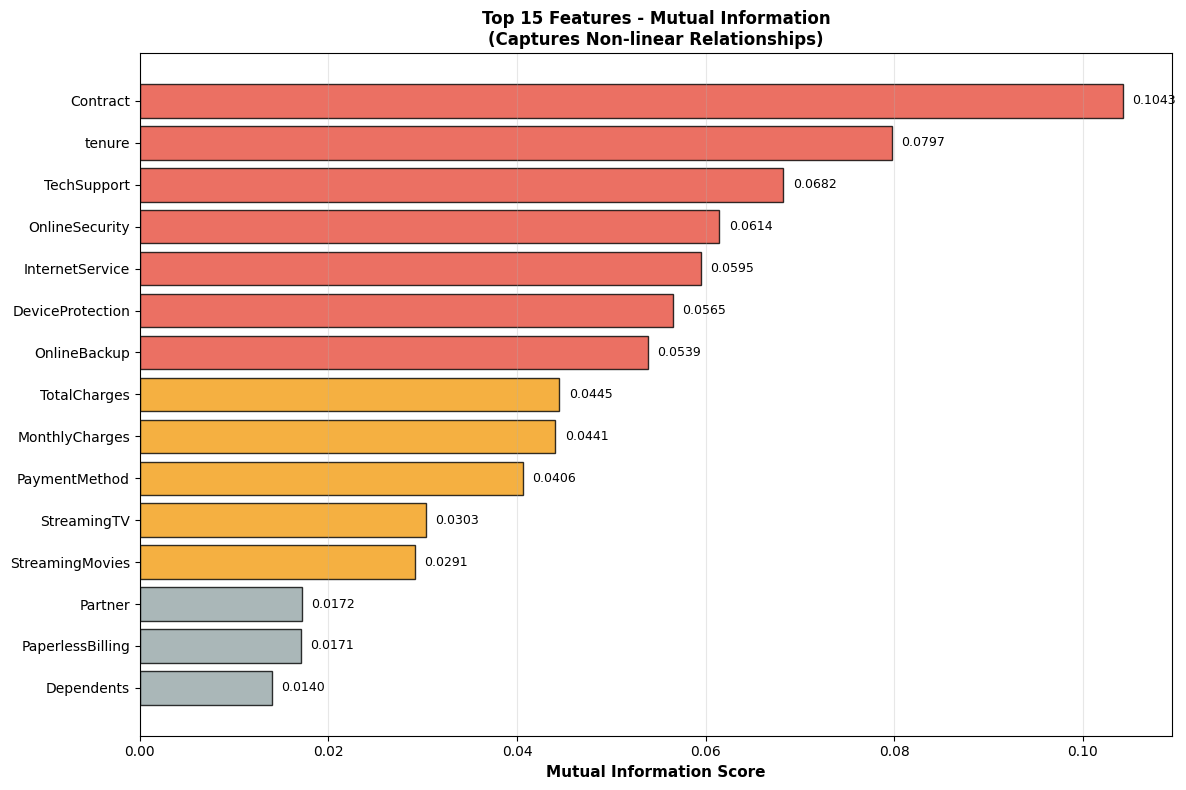

   ✅ Plot 1 saved!


In [33]:
# Plot 1: Mutual Information Top 15
print("   Creating Plot 1: Mutual Information...")
fig1, ax1 = plt.subplots(figsize=(12, 8))
top_15_mi = mi_df.head(15).sort_values('MI_Score', ascending=True)
colors_mi = ['#e74c3c' if score >= 0.05 else '#f39c12' if score >= 0.02 else '#95a5a6' 
             for score in top_15_mi['MI_Score']]
ax1.barh(range(len(top_15_mi)), top_15_mi['MI_Score'].values, color=colors_mi, edgecolor='black', alpha=0.8)
ax1.set_yticks(range(len(top_15_mi)))
ax1.set_yticklabels(top_15_mi['Feature'].values, fontsize=10)
ax1.set_xlabel('Mutual Information Score', fontweight='bold', fontsize=11)
ax1.set_title('Top 15 Features - Mutual Information\n(Captures Non-linear Relationships)', fontweight='bold', fontsize=12)
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(top_15_mi['MI_Score'].values):
    ax1.text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=9)
plt.tight_layout()
plt.savefig('../data/processed/13a_mi_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ Plot 1 saved!")


   Creating Plot 2: Random Forest Importance...


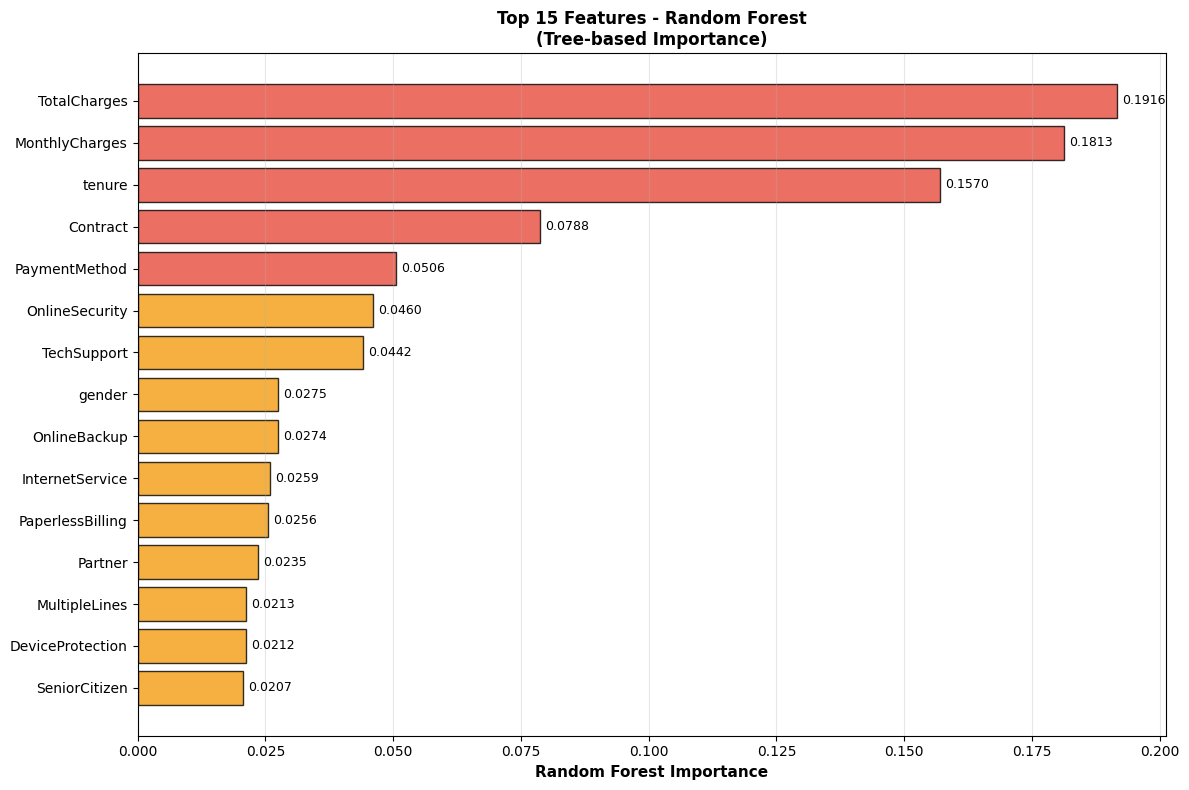

   ✅ Plot 2 saved!


In [34]:
# Plot 2: Random Forest Top 15
print("   Creating Plot 2: Random Forest Importance...")
fig2, ax2 = plt.subplots(figsize=(12, 8))
top_15_rf = rf_importance.head(15).sort_values('RF_Importance', ascending=True)
colors_rf = ['#e74c3c' if score >= 0.05 else '#f39c12' if score >= 0.02 else '#95a5a6' 
             for score in top_15_rf['RF_Importance']]
ax2.barh(range(len(top_15_rf)), top_15_rf['RF_Importance'].values, color=colors_rf, edgecolor='black', alpha=0.8)
ax2.set_yticks(range(len(top_15_rf)))
ax2.set_yticklabels(top_15_rf['Feature'].values, fontsize=10)
ax2.set_xlabel('Random Forest Importance', fontweight='bold', fontsize=11)
ax2.set_title('Top 15 Features - Random Forest\n(Tree-based Importance)', fontweight='bold', fontsize=12)
ax2.grid(axis='x', alpha=0.3)
for i, v in enumerate(top_15_rf['RF_Importance'].values):
    ax2.text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=9)
plt.tight_layout()
plt.savefig('../data/processed/13b_rf_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ Plot 2 saved!")

   Creating Plot 3: Combined Importance Score...


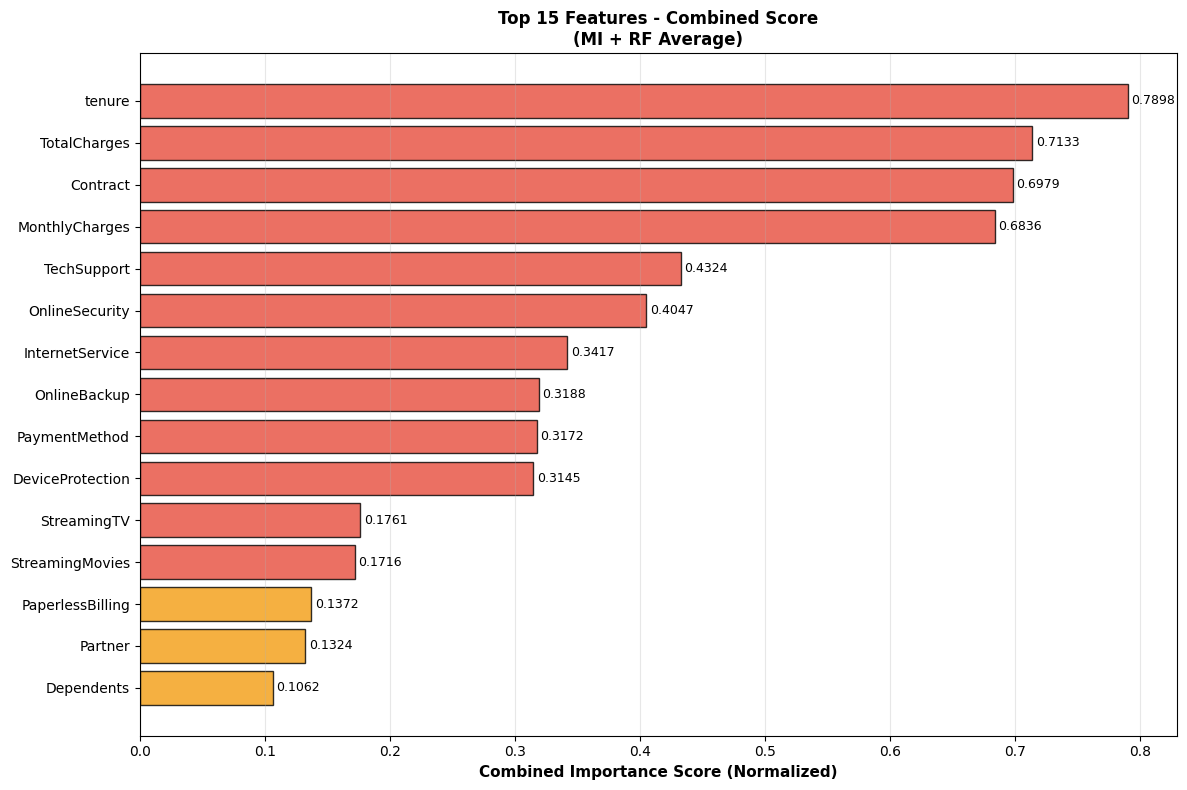

   ✅ Plot 3 saved!


In [35]:
# Plot 3: Combined Score Top 15
print("   Creating Plot 3: Combined Importance Score...")
fig3, ax3 = plt.subplots(figsize=(12, 8))
top_15_combined = combined_importance.head(15).sort_values('Combined_Score', ascending=True)
colors_combined = ['#e74c3c' if score >= 0.15 else '#f39c12' if score >= 0.05 else '#95a5a6' 
                   for score in top_15_combined['Combined_Score']]
ax3.barh(range(len(top_15_combined)), top_15_combined['Combined_Score'].values, color=colors_combined, edgecolor='black', alpha=0.8)
ax3.set_yticks(range(len(top_15_combined)))
ax3.set_yticklabels(top_15_combined['Feature'].values, fontsize=10)
ax3.set_xlabel('Combined Importance Score (Normalized)', fontweight='bold', fontsize=11)
ax3.set_title('Top 15 Features - Combined Score\n(MI + RF Average)', fontweight='bold', fontsize=12)
ax3.grid(axis='x', alpha=0.3)
for i, v in enumerate(top_15_combined['Combined_Score'].values):
    ax3.text(v + 0.003, i, f'{v:.4f}', va='center', fontsize=9)
plt.tight_layout()
plt.savefig('../data/processed/13c_combined_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ Plot 3 saved!")

   Creating Plot 4: Importance Distribution...


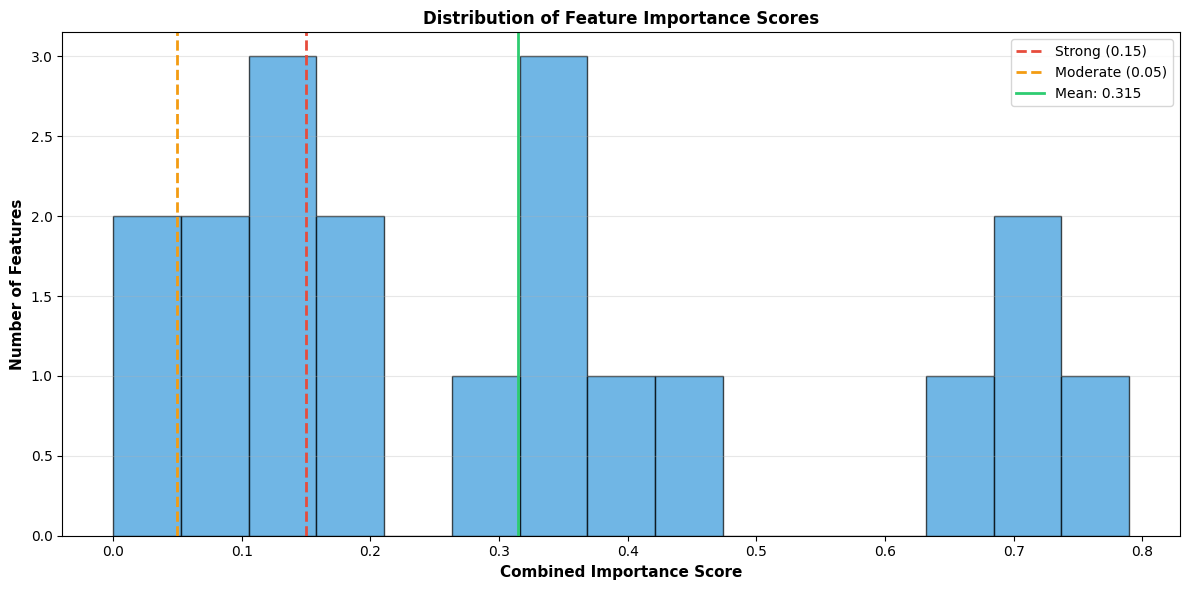

   ✅ Plot 4 saved!

✅ All visualizations generated successfully!


In [36]:
# Plot 4: Feature Importance Distribution
print("   Creating Plot 4: Importance Distribution...")
fig4, ax4 = plt.subplots(figsize=(12, 6))
ax4.hist(combined_importance['Combined_Score'], bins=15, color='#3498db', edgecolor='black', alpha=0.7)
ax4.axvline(0.15, color='#e74c3c', linestyle='--', linewidth=2, label='Strong (0.15)')
ax4.axvline(0.05, color='#f39c12', linestyle='--', linewidth=2, label='Moderate (0.05)')
mean_score = combined_importance['Combined_Score'].mean()
ax4.axvline(mean_score, color='#2ecc71', linestyle='-', linewidth=2, label=f'Mean: {mean_score:.3f}')
ax4.set_xlabel('Combined Importance Score', fontweight='bold', fontsize=11)
ax4.set_ylabel('Number of Features', fontweight='bold', fontsize=11)
ax4.set_title('Distribution of Feature Importance Scores', fontweight='bold', fontsize=12)
ax4.legend(fontsize=10, loc='upper right')
ax4.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../data/processed/13d_importance_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ Plot 4 saved!")

print("\n✅ All visualizations generated successfully!")

### 4.6 Save Encoded Dataset

In [37]:

print("SAVE ENCODED DATA & ARTIFACTS")


# Save encoded dataset
df_encoded.to_csv('../data/processed/telco_encoded.csv', index=False)
print("\n✅ Encoded dataset saved!")
print(f"   Location: data/processed/telco_encoded.csv")
print(f"   Shape: {df_encoded.shape}")

# Save feature importance summary
combined_importance.to_csv('../data/processed/feature_importance_summary.csv', index=False)
print("\n✅ Feature importance summary saved!")
print(f"   Location: data/processed/feature_importance_summary.csv")

# Save label encoders
import pickle
with open('../data/processed/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
print("\n✅ Label encoders saved!")
print(f"   Location: data/processed/label_encoders.pkl")

# Version control
import shutil
shutil.copy('../data/processed/telco_encoded.csv', '../data/v1/telco_encoded_v1.csv')
shutil.copy('../data/processed/feature_importance_summary.csv', '../data/v1/feature_importance_v1.csv')
print("\n✅ Version 1 snapshots created!")
print(f"   Location: data/v1/")

SAVE ENCODED DATA & ARTIFACTS

✅ Encoded dataset saved!
   Location: data/processed/telco_encoded.csv
   Shape: (7032, 20)

✅ Feature importance summary saved!
   Location: data/processed/feature_importance_summary.csv

✅ Label encoders saved!
   Location: data/processed/label_encoders.pkl

✅ Version 1 snapshots created!
   Location: data/v1/
